[*********************100%%**********************]  1 of 1 completed


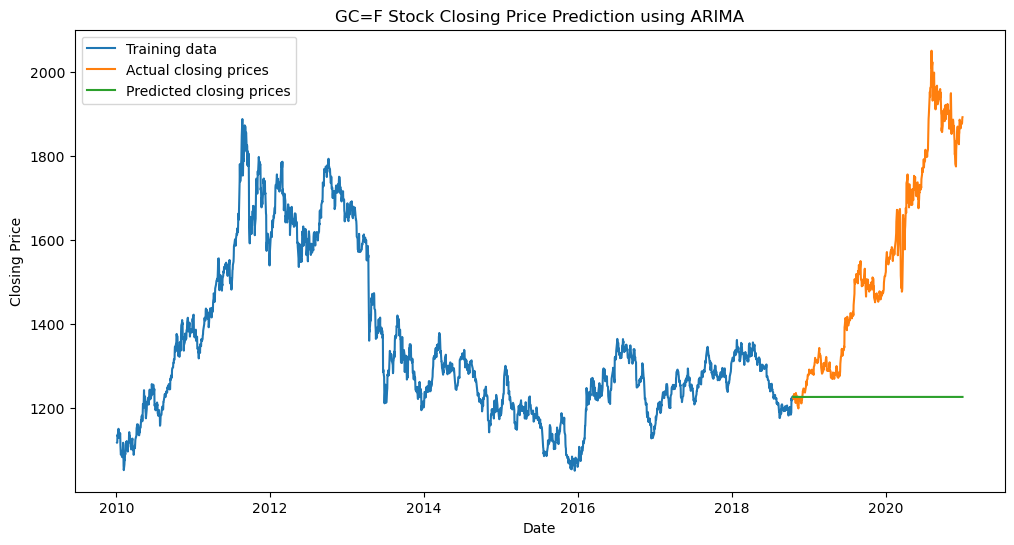

RMSE: 402.2208568648326, Best ARIMA Order: (2, 1, 2)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
import warnings

# Function to encapsulate your ARIMA stock price prediction
def predict_stock_prices(symbol, start_date="2010-01-01", end_date="2021-01-01"):
    # Ignore warnings
    warnings.filterwarnings("ignore")

    # Set up Yahoo Finance data source
    yf.pdr_override()

    # Get historical stock data
    stock_data = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)

    # Extract closing prices
    closing_prices = stock_data["Close"]

    # Divide data into training and testing sets
    train_data = closing_prices[:int(len(closing_prices) * 0.8)]
    test_data = closing_prices[int(len(closing_prices) * 0.8):]

    # Determine optimal ARIMA parameters with grid search
    p_values = range(0, 5)
    d_values = range(0, 5)
    q_values = range(0, 5)
    pdq_combinations = list(itertools.product(p_values, d_values, q_values))
    best_aic = float("inf")
    best_order = None
    best_model = None

    for order in pdq_combinations:
        try:
            model = ARIMA(train_data, order=order)
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = order
                best_model = model_fit
        except Exception as e:
            continue

    # Forecast stock prices using optimal ARIMA model
    predictions = best_model.forecast(steps=len(test_data))

    # Compute root mean squared error (RMSE)
    rmse = sqrt(mean_squared_error(test_data, predictions))

    # Plotting the results (you can also choose to return values instead)
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label="Training data")
    plt.plot(test_data, label="Actual closing prices")
    plt.plot(test_data.index, predictions, label="Predicted closing prices")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title(f"{symbol} Stock Closing Price Prediction using ARIMA")
    plt.legend()
    plt.show()

    # Optionally, return the rmse, predictions, and/or other relevant information
    return rmse, best_order

